In [1]:
import requests
import datetime 
from bs4 import BeautifulSoup as soup
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
%matplotlib inline

In [2]:
def setPage(URL):
    response = requests.get(URL)
    if response.status_code == 200:
        return soup(response.text)
    raise Exception(f"response code = {response.status_code}")

In [3]:
def strip_junk(line):
    date_to_format, *content = line.lstrip("average180.push([new Date('").replace("')", "").replace("]);", '').split(", ")
    date = datetime.date.fromisoformat(date_to_format.replace("/", "-"))#.strftime("%Y:%m:%d")
    day, avg = list(map(int, content))
    return [date, day, avg] 

In [4]:
def get_points(page):
    dane_zasmiecone = page.body.find("script").text.split("\n\t\t\t\t\t\n                \t")
    dane_z_6_miesiecy = [line for line in dane_zasmiecone if line.startswith("average180")]
    dane_do_wykresu = [strip_junk(line) for line in dane_z_6_miesiecy]
    return dane_do_wykresu

In [5]:
def get_categories(page):
    all_categories = page.find("div", {"class": "categories"}).find_all("li")
    names_and_categories = [{"name": el.text, "link": el.a["href"]} for el in all_categories]
    return names_and_categories

In [6]:
def get_all_items_on_page(page):
    return page.find("div", {"class": "content"}).table.tbody.find_all("tr")

def get_item_name(obj):
    return obj.td.span.text

def get_item_link(obj):
    return obj.td.a["href"]

In [25]:
def table_dict_update(table, dates, values, name):
    pddates = pd.DatetimeIndex(dates)
    mydict = {date:value for date, value in zip(pddates, values)}
    series = pd.Series(mydict, name=name)
    table = table.append(series)
    return table

In [7]:
link = "https://secure.runescape.com/m=itemdb_rs/Crustacea+armour+token/viewitem?obj=50401"
link2 = 'https://secure.runescape.com/m=itemdb_rs/catalogue'
link_base_categories = "https://secure.runescape.com/m=itemdb_rs/{}"

In [34]:
mypage = setPage("https://secure.runescape.com/m=itemdb_rs/catalogue?cat=24")

In [35]:
links_to_pages = mypage.find("div", class_ = "paging").find_all("a")

In [38]:
%timeit [str(i) for i in range(1, len(links_to_pages)+1)]

712 ns ± 11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [37]:
%timeit [link.text for link in links_to_pages]

4.05 µs ± 39.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
page_soup = setPage(link2)

In [30]:
def make_table():
    table = pd.DataFrame() 
    categories = get_categories(page_soup)
    for cat in categories:
        link_temp = link_base_categories.format(cat["link"])
        page_temp = setPage(link_temp)
        items = get_all_items_on_page(page_temp)
        for item in items[:3]:
            item_name = get_item_name(item)
            item_link = get_item_link(item)
            item_page = setPage(item_link)
            item_points = get_points(item_page)
            Dates, Values, Average = list(zip(*item_points))
            table = table_dict_update(table, Dates, Values, item_name)
            sleep(1)
        sleep(1)
        break
    return table

,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,...,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04
Adamant brutal,385.0,385.0,385.0,385.0,385.0,385.0,385.0,385.0,385.0,385.0,...,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0
Adamant dart,47.0,47.0,47.0,47.0,47.0,47.0,45.0,45.0,45.0,45.0,...,50.0,50.0,50.0,52.0,52.0,52.0,52.0,53.0,53.0,53.0
Adamant javelin,62.0,62.0,62.0,64.0,64.0,64.0,63.0,63.0,64.0,64.0,...,66.0,66.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,66.0


In [86]:
points = get_points(page_soup)

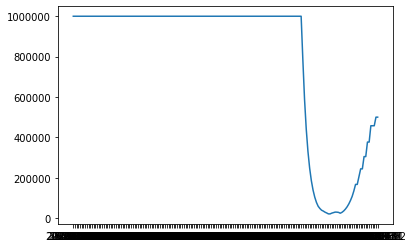

In [93]:
Dates, Values, Average = list(zip(*points))
plt.plot(Dates, Values)

In [94]:
# import matplotlib.pyplot as plt

# x = np.linspace(0, 10, 500)
# y = np.sin(x)

# fig, ax = plt.subplots()

# line1, = ax.plot(x, y, label='Using set_dashes()')
# line1.set_dashes([2, 2, 10, 2]) 

# line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

# ax.legend()
# plt.show()

In [14]:
# from selenium import webdriver

# # path = r'C:\Users\Urszula\Desktop\wojtek\Python\geckodriver'
# browser = webdriver.Chrome()

# browser.get(link)

# var = browser.find_element_by_tag_name("svg").find_element_by_tag_name("g").find_element_by_tag_name("g").find_element_by_tag_name("g")

# chart_height = var.find_element_by_tag_name("rect").get_attribute("y")

# chart_height = int(chart_height) - 3

# 395/377

# chart = browser.find_elements_by_tag_name("circle")

# punkty = []
# for i, punkt in enumerate(chart):
# #     CX = punkt.get_attribute("cx")
#     CY = punkt.get_attribute("cy")
#     height = chart_height - float(CY)
#     punkty.append((i, height))
    
# punkty = punkty[::-1]
# punkty
# browser.close()